# Data Preprocessing for Fraud Detection

In this notebook, we will focus on cleaning and preprocessing the dataset to prepare it for feature engineering and modeling. The tasks include handling missing values, removing duplicates, and correcting data types.

In [2]:
# --------------------------------------------------
# 1. Import Libraries
# --------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [4]:
# --------------------------------------------------
# 2.Load Raw Data
# --------------------------------------------------
raw_file = "../data/raw/Fraud_Data.csv"
df = pd.read_csv(raw_file)
print(f"Raw data shape: {df.shape}")
df.head()

Raw data shape: (151112, 11)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [5]:
# --------------------------------------------------
# 3️⃣ Inspect Data
# --------------------------------------------------
# Check missing values
print(df.isnull().sum())

# Check duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Data types
print(df.dtypes)


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Duplicate rows: 0
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object


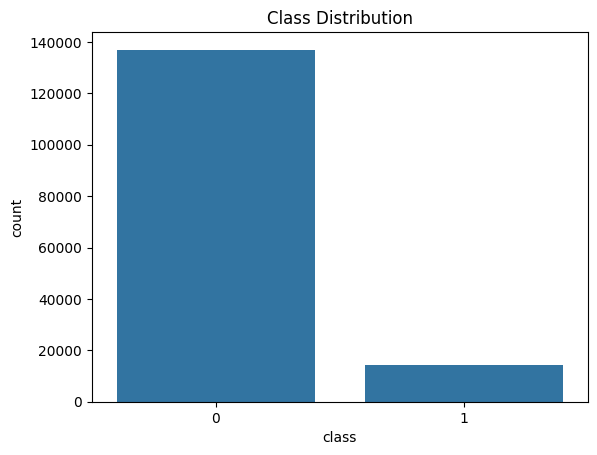

Shape after dropping columns: (151112, 8)


In [6]:
# Class distribution
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()

# --------------------------------------------------
# 4️⃣ Drop unnecessary columns
# --------------------------------------------------
drop_cols = ["user_id", "signup_time", "purchase_time"]
df.drop(columns=drop_cols, inplace=True, errors="ignore")
print(f"Shape after dropping columns: {df.shape}")


In [7]:
# --------------------------------------------------
# 5️⃣ Handle Missing Values
# --------------------------------------------------
num_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = df.select_dtypes(include=["object", "category"]).columns.tolist()

# Numeric imputer
df[num_features] = SimpleImputer(strategy="median").fit_transform(df[num_features])

# Categorical imputer
df[cat_features] = SimpleImputer(strategy="most_frequent").fit_transform(df[cat_features])

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
